<a href="https://colab.research.google.com/github/DavidAMills/quickshift/blob/master/quickshiftPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [67]:
# Mounts my google drive, which contains files for my data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prior to running code blocks 2 and 3, upload dependent files from Google Drive:

*   __init__.py
*   mutual_neighborhood_graph.h
*   quickshift_pp.cpp
*   quickshift_pp.pyx
*   setup.py



In [68]:
!python setup.py build

running build
running build_ext
skipping 'quickshift_pp.cpp' Cython extension (up-to-date)


In [69]:
!python setup.py install

running install
running build
running build_ext
skipping 'quickshift_pp.cpp' Cython extension (up-to-date)
running install_lib
running install_egg_info
Removing /usr/local/lib/python2.7/dist-packages/QuickshiftPP-1.0.egg-info
Writing /usr/local/lib/python2.7/dist-packages/QuickshiftPP-1.0.egg-info


# This section provides a step-by-step breakdown of the example code from the README.rst at:<br> <center>https://github.com/google/quickshift/</center>
## Definitions:
> **NN**: Nearest Neighbor<br>
> **k**: The number of neighbors (i.e. the k in k-NN density).<br>
> **beta**: The fluctuation parameter which ranges between 0 and 1.
## Functions:
> **np.random.normal(loc,scale,size)**
>> **loc**: Mean ("center") of the distribution.<br>
>> **scale**: Standard deviation (spread or "width") of the distribution.<br>
>> **size**: The shape for which samples are drawn (ie. 2-dimensional or 3-dimensional arrays).




## This code creates the sample data and a scatterplot of the data:

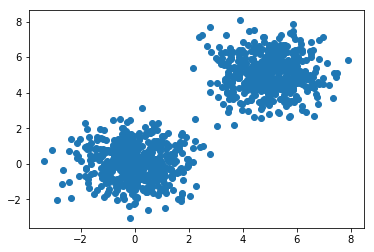

In [274]:
from QuickshiftPP import *
import numpy as np

# List X draws random samples from a normal (Gaussian) distribution.
# np.random.normal accepts three parameters, in this order:
# loc: Mean ("center") of the distribution
X = [np.random.normal(0, 1, 2) for i in range(500)] + [np.random.normal(5, 1, 2) for i in range(500)]

import matplotlib.pyplot as plt
# Create empty arrays for plotting.
plot_x = []
plot_y = []
# Takes list of arrays and put into two variables for user-friendliness.
for i in X:
  plot_x.append(i[0])
  plot_y.append(i[1])
# Plot the points in a scatterplot.
plt.scatter(plot_x,plot_y)

## Functions:


> **QuickshiftPP**: Determines clusters by computing the knn density estimate and distances using kdtree (**sklearn.neighbors.KDTree**).  Then, builds knn neighbor graphs to update the cluster count and membership attributes.



In [275]:
# y is a list with one-hundred 0's and one-hundred 1's, in that order.
# This is the ground-truthing.  We know that we intended to create two clusters unique of points.
# Make data a numpy array for visual comparison below.
y = np.asarray([0] * 500 + [1] * 500)

# Declare a Quickshift++ model with tuning hyperparameters.
model = QuickshiftPP(k=20, beta=.5)

# Compute the clustering.
model.fit(X)
# The QuickshiftPP model's results.
y_hat = model.memberships

# Print y (ground truth) and y_hat (model) to visualize the difference.
print(y)
print(y_hat)

# Check the goodness of the function:
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
# A straight-forward metric that ranks the quality, miss one lose .4%
print("Adj. Rand Index Score: %f." % adjusted_rand_score(y_hat, y))
# Adjusts the score by weighting based on the number of points (more points is more difficult and is scored less harshly).
print("Adj. Mutual Info Score: %f." % adjusted_mutual_info_score(y_hat, y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Plots of Grount Truth and Quickshift++ predicted classification:

Text(0.5,1,'Quickshift++ Predicted')

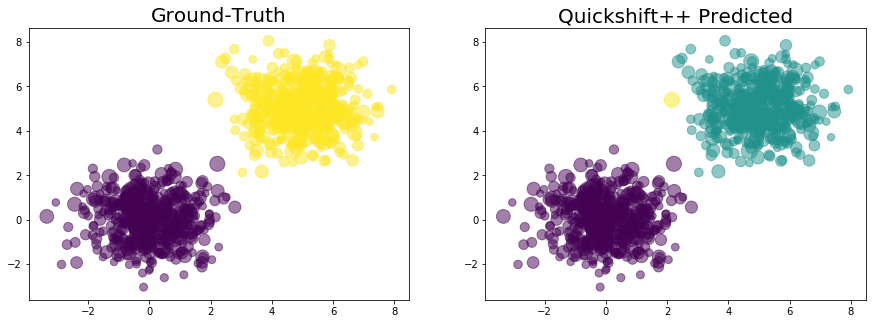

In [276]:
f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(plot_x,plot_y,knn_radius*100,c=y,alpha=.5)
plt.title("Ground-Truth",fontdict={'fontsize':  20})
plt.subplot(1,2,2)
plt.scatter(plot_x,plot_y,knn_radius*100,c=y_hat,alpha=.5)
plt.title("Quickshift++ Predicted",fontdict={'fontsize':  20})

In [279]:
!pip install rasterio

ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/pip/_internal/cli/base_command.py", line 188, in main
    status = self.run(options, args)
  File "/usr/local/lib/python2.7/dist-packages/pip/_internal/commands/install.py", line 286, in run
    with self._build_session(options) as session:
  File "/usr/local/lib/python2.7/dist-packages/pip/_internal/cli/base_command.py", line 108, in _build_session
    index_urls=self._get_index_urls(options),
  File "/usr/local/lib/python2.7/dist-packages/pip/_internal/download.py", line 559, in __init__
    self.headers["User-Agent"] = user_agent()
  File "/usr/local/lib/python2.7/dist-packages/pip/_internal/download.py", line 144, in user_agent
    zip(["name", "version", "id"], distro.linux_distribution()),
  File "/usr/local/lib/python2.7/dist-packages/pip/_vendor/distro.py", line 122, in linux_distribution
    return _distro.linux_distribution(full_distribution_name)
  File "/usr/local/lib/python2

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.windows import Window

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

ImportError: ignored

In [0]:
img = img_as_float(astronaut()[::2, ::2])
print(img.shape)
type(img)

(256, 256, 3)


numpy.ndarray

In [0]:
src = rasterio.open("image.tiff")
print(src.shape)
type(src)
print(src.count)
print(src.width)
print(src.height)

x_corner = 2744
y_corner = 2744
x_inc = 512

image = [0,1,2,3]

# Loop through 3 image windows.
for i in range(3):
    if i < 1:
        image[i] = src.read([1,2,3], window = Window(x_corner, y_corner, x_inc, x_inc))
    else:
        x_corner = x_corner + x_inc
        image[i] = src.read([1,2,3], window = Window(x_corner, y_corner, x_inc, x_inc))
    image[i] = np.transpose(image[i],[1,2,0])
    print(image[i].shape)
    image[3] = image[0]

(6000, 6000)
4
6000
6000
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


In [0]:
def segment_image(img,f_scale,f_sigma,f_min_size,slic_segments,slic_compactness,slic_sigma,quick_size,quick_dist,quick_ratio,w_markers,w_compactness):
    #segments_fz = felzenszwalb(img, scale=f_scale, sigma=f_sigma, min_size=f_min_size)
    segments_quickpp = QuickshiftPP(k=20, beta=.5)
    segments_slic = slic(img, n_segments=slic_segments, compactness=slic_compactness, sigma=slic_sigma)
    segments_quick = quickshift(img, kernel_size=quick_size, max_dist=quick_dist, ratio=quick_ratio)
    gradient = sobel(rgb2gray(img))
    segments_watershed = watershed(gradient, markers=w_markers, compactness=w_compactness)
    
    #print("Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
    print("SLIC number of segments: {len(np.unique(segments_slic))}")
    print("Quickshift number of segments: {len(np.unique(segments_quick))}")
    
    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

    #ax[0, 0].imshow(mark_boundaries(img, segments_fz))
    #ax[0, 0].set_title("Felzenszwalbs's method")
    ax[0, 1].imshow(mark_boundaries(img, segments_slic))
    ax[0, 1].set_title('SLIC')
    ax[1, 0].imshow(mark_boundaries(img, segments_quick))
    ax[1, 0].set_title('Quickshift')
    ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
    ax[1, 1].set_title('Compact watershed')

    for a in ax.ravel():
        a.set_axis_off()

    plt.tight_layout()
    plt.show()

SLIC number of segments: {len(np.unique(segments_slic))}
Quickshift number of segments: {len(np.unique(segments_quick))}


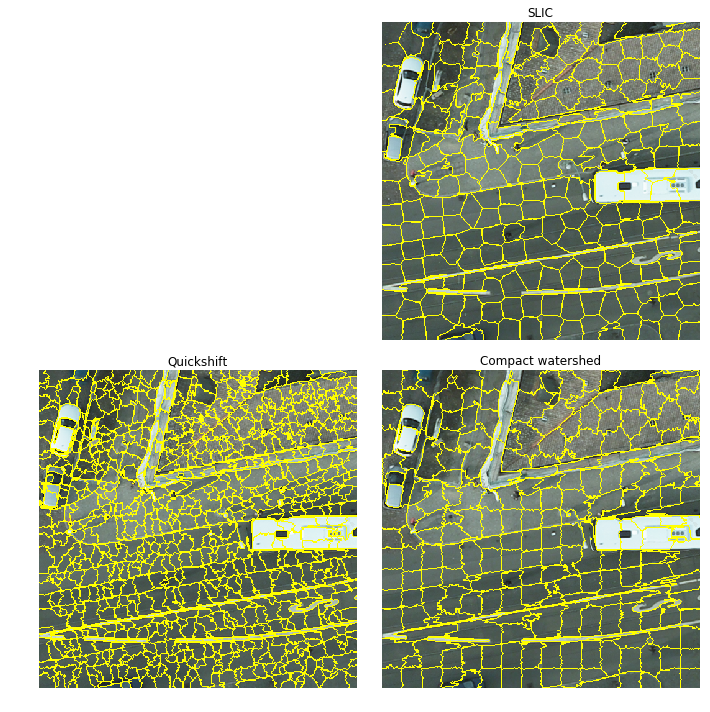

SLIC number of segments: {len(np.unique(segments_slic))}
Quickshift number of segments: {len(np.unique(segments_quick))}


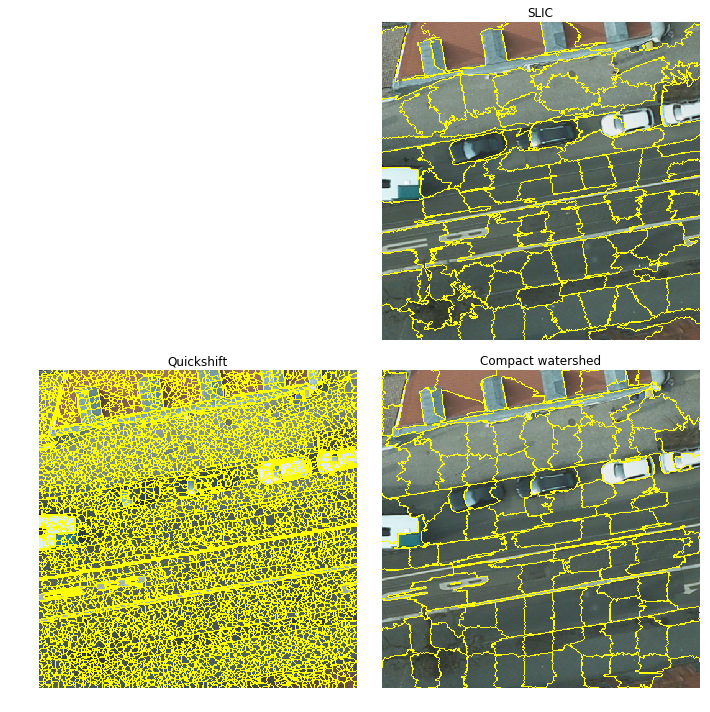

SLIC number of segments: {len(np.unique(segments_slic))}
Quickshift number of segments: {len(np.unique(segments_quick))}


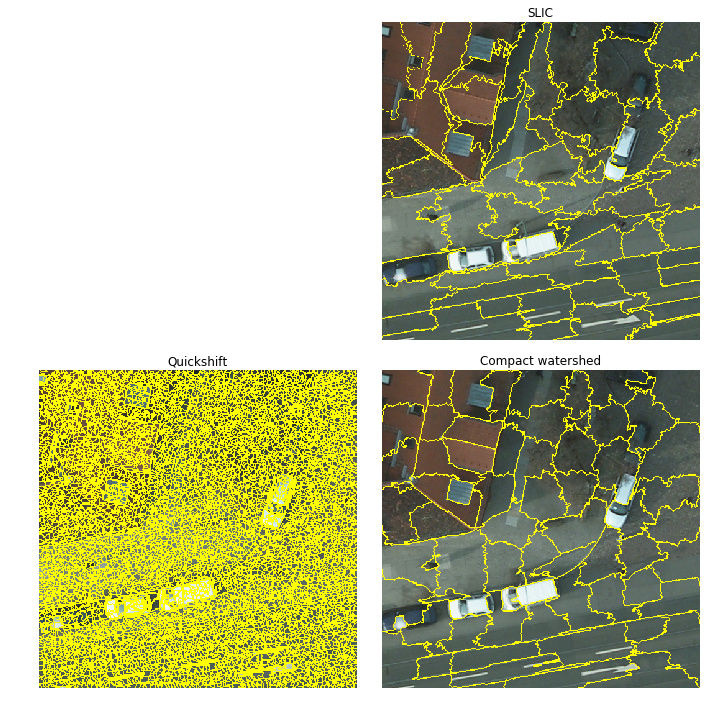

In [0]:
for i in range(1,4):
    segment_image(image[i],round(100/i),0.50/i,round(50/i),round(250/i),round(10/i),round(1/i),round(3/i),round(6/i),.5/i,round(250/i),0.001/i)